<a href="https://colab.research.google.com/github/kumar1607/Customer_Segmentation_Analysis/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Context

This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

Content

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# statistical info
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Exploratory Data Analysis**

<Axes: xlabel='count', ylabel='Gender'>

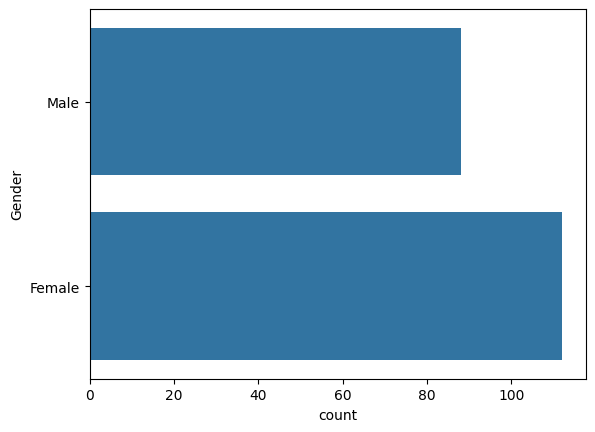

In [5]:
sns.countplot(df['Gender'])

As usual female count is more

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

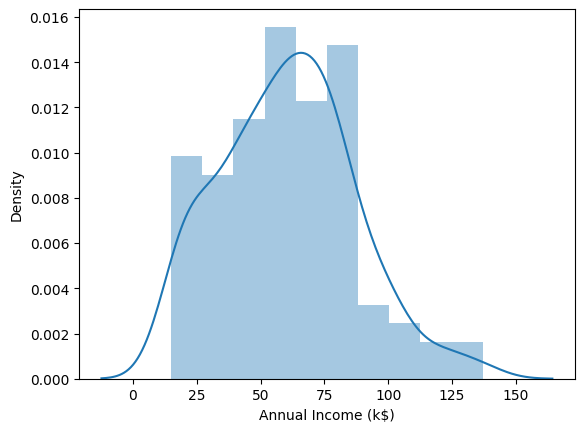

In [6]:
sns.distplot(df['Annual Income (k$)'])



data is symmetric which is a good sign

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

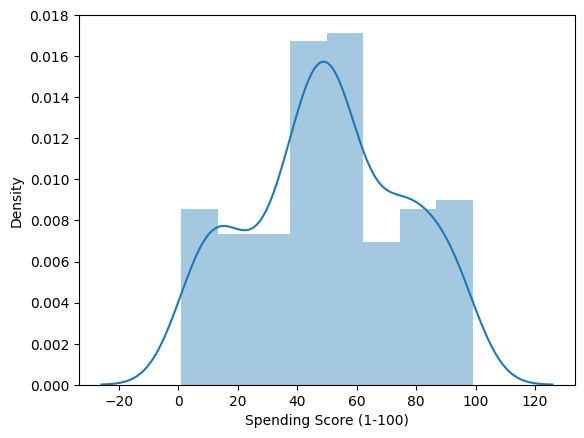

In [7]:
sns.distplot(df['Spending Score (1-100)'])

**Correlation Matrix**

<Axes: >

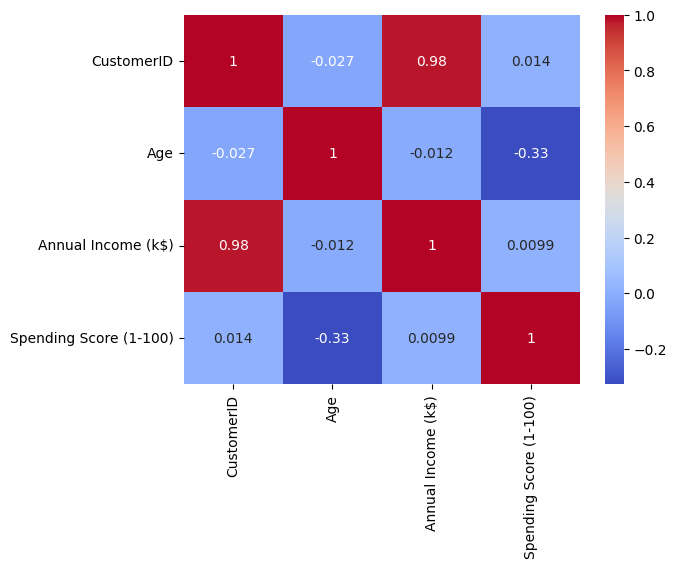

In [8]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

**Clustering**

In [9]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
14,15,Male,37,20,13
181,182,Female,32,97,86
54,55,Female,50,43,45
119,120,Female,50,67,57
114,115,Female,18,65,48


In [11]:
# cluster on 2 features
# 2 main features are annual income and spending score
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


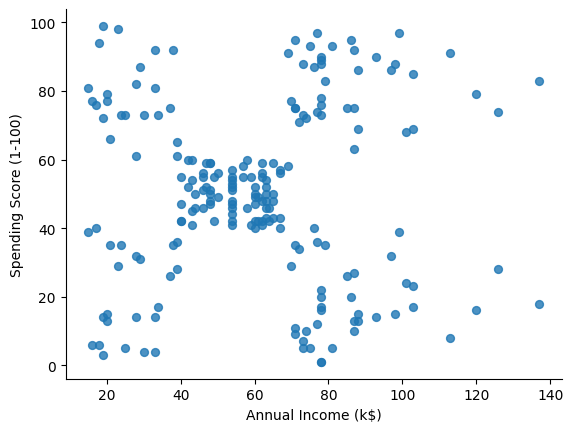

In [14]:
# @title Annual Income (k$) vs Spending Score (1-100)

from matplotlib import pyplot as plt
df1.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
from sklearn.cluster import KMeans
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

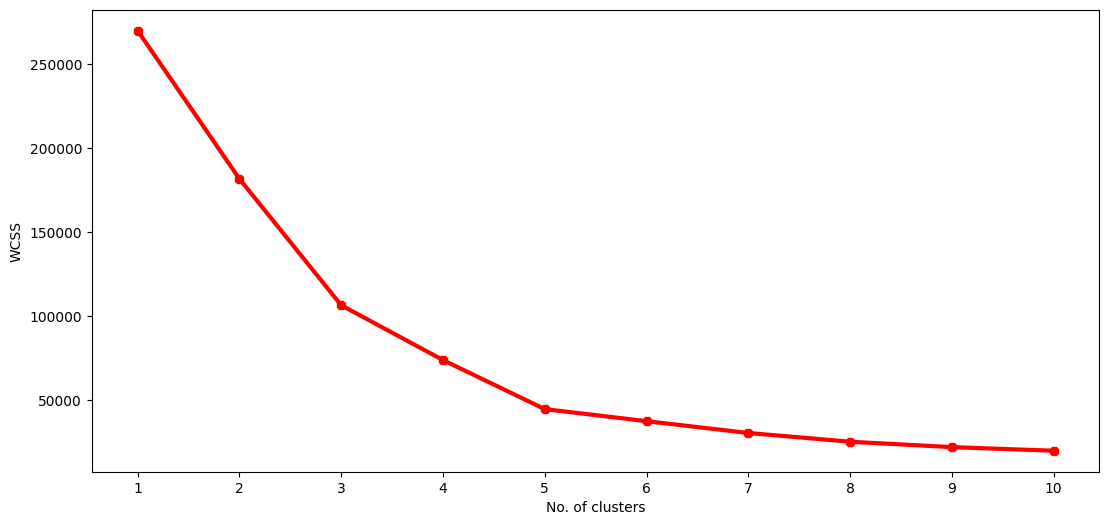

In [16]:
# ploting the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

#In K-means clustering, WCSS (Within-Cluster Sum of Squares)
 #is a measure of how well data points within a cluster are grouped together.
  #It essentially indicates the total variance within each cluster, reflecting how closely data points
  #in a cluster are situated to their respective centroid (the average point representing the cluster).


The elbow method is a graphical technique used to determine the optimal number of clusters (k) in the k-means clustering algorithm. It analyzes the distortion or inertia within clusters as the number of clusters increases

Here's a breakdown of how it works:

1.Run k-means clustering for different values of k: You start by running the k-means algorithm with various k values, typically ranging from 1 to a pre-determined maximum (e.g., 10).

2.Calculate Within-Cluster Sum of Squares (WCSS) for each k: For each value of k, you calculate the WCSS, which represents the sum of squared distances between each data point and its assigned cluster centroid (center). A lower WCSS indicates more compact and well-formed clusters.

3.Plot WCSS vs. k: You then create a graph with the number of clusters (k) on the x-axis and the WCSS values on the y-axis.

4.Identify the "elbow": Look for the point on the graph where the WCSS curve begins to flatten out or "elbow" significantly. This elbow point typically indicates the optimal value of k.
Key points to understand about the elbow method:

It's a** heuristic approach** and doesn't guarantee the absolute optimal number of clusters.
It often works well for spherical or well-separated clusters but may not be suitable for complex or elongated cluster shapes.
Other evaluation techniques like silhouette analysis or gap statistics can be used alongside the elbow method for a more robust assessment.1.

In [17]:
km = KMeans(n_clusters=5)
km.fit(df1)
y = km.predict(df1)
df1['Label'] = y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

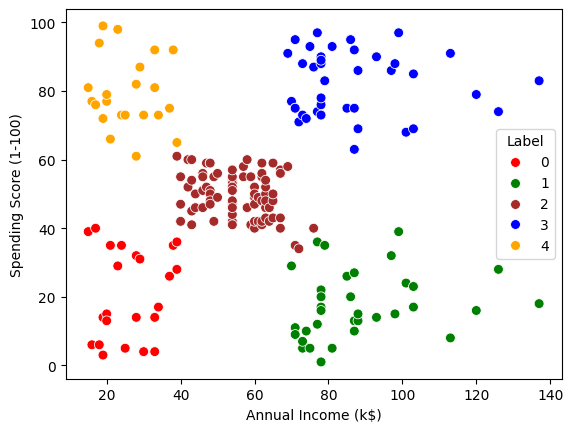

In [18]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='Label', s=50, palette=['red', 'green', 'brown', 'blue', 'orange'])


  Now
  based on this cluster the marketing team can plan their strategies accordingly

In [19]:
# similarly clustering on 3 main features


df2 = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [20]:
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)

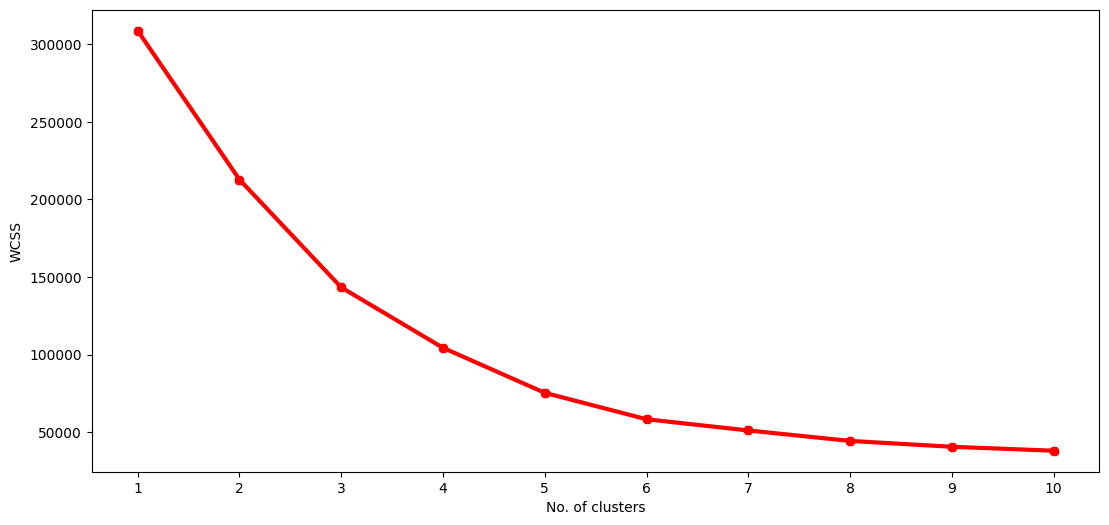

In [21]:
# ploting the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [22]:
km = KMeans(n_clusters=5)
km.fit(df2)
y = km.predict(df2)
df2['Label'] = y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,2
1,15,81,21,3
2,16,6,20,2
3,16,77,23,3
4,17,40,31,2


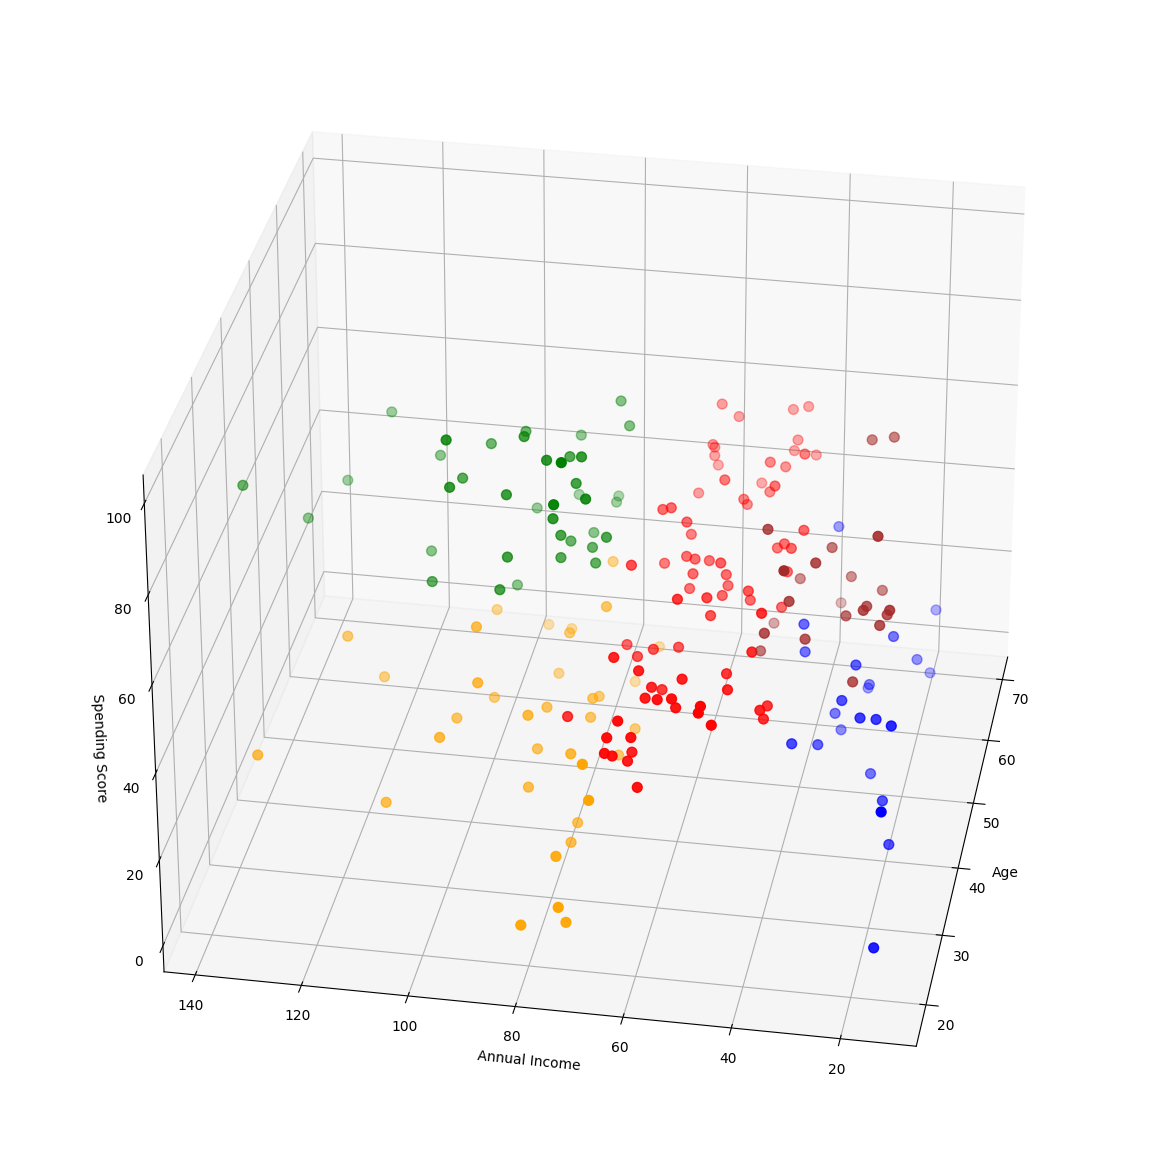

In [23]:
# 3d scatter plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df2['Age'][df2['Label']==0], df2['Annual Income (k$)'][df2['Label']==0], df2['Spending Score (1-100)'][df2['Label']==0], c='red', s=50)
ax.scatter(df2['Age'][df2['Label']==1], df2['Annual Income (k$)'][df2['Label']==1], df2['Spending Score (1-100)'][df2['Label']==1], c='green', s=50)
ax.scatter(df2['Age'][df2['Label']==2], df2['Annual Income (k$)'][df2['Label']==2], df2['Spending Score (1-100)'][df2['Label']==2], c='blue', s=50)
ax.scatter(df2['Age'][df2['Label']==3], df2['Annual Income (k$)'][df2['Label']==3], df2['Spending Score (1-100)'][df2['Label']==3], c='brown', s=50)
ax.scatter(df2['Age'][df2['Label']==4], df2['Annual Income (k$)'][df2['Label']==4], df2['Spending Score (1-100)'][df2['Label']==4], c='orange', s=50)
ax.view_init(30, 190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()